# Principal Component Analysis：Examples #

## Example 1: Breast Cancer ##

The first example came from https://datascienceplus.com/principal-component-analysis-pca-with-python/, part of the *Advanced Modeling in Python* course of the *datascience+*.  
In this example, the author applied the Principal Component Analysis (PCA) to compress the dimension of real data of brest cancer cases in Wisconsin, US.  
The result of the PCA analysis shows that the two dinmension scatter plot is able to distinguish whether the tumors are benign or malignant. 

**Introduction**

Principal Component Analysis(PCA) is an unsupervised statistical technique used to examine the interrelation among a set of variables in order to identify the underlying structure of those variables. In simple words, suppose you have 30 features column in a data frame so it will help to reduce the number of features making a new feature which is the combined effect of all the feature of the data frame. It is also known as factor analysis.  

So, in regression, we usually determine the line of best fit to the dataset but here in the PCA, we determine several orthogonal lines of best fit to the dataset. Orthogonal means these lines are at a right angle to each other. Actually, the lines are perpendicular to each other in the n-dimensional space.  

Here, n-dimensional space is a variable sample space. The number of dimensions will be the same as there are a number of variables. Eg-A dataset with 3 features or variable will have 3-dimensional space. So let us visualize what does it mean with an example. Here we have some data plotted with two features x and y and we had a regression line of best fit.

![jupyter](./figures/regression.png)

Now we are going to add an orthogonal line to the first line.

![jupyter](./figures/orthogonal.png)

Components are a linear transformation that chooses a variable system for the dataset such that the greatest variance of the dataset comes to lie on the first axis. Likewise, the second greatest variance on the second axis and so on… Hence, this process will allow us to reduce the number of variables in the dataset.  

We will understand this better when we implement and visualize using the python code.

**Step1: Import Libraries Get Data**

In [2]:
# We will import the important python libraries required for this algorithm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# Import the dataset from the python library sci-kit-learn.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
# See load_breast_cancer? for detailed introduction of the dataset
load_breast_cancer?

The datset is in a form of a dictionary.

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['data'])
print(cancer['feature_names'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(cancer['target'])
print(cancer['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
# Now lets make the Dataframe for the given data and check its head value.

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step2: Standardize the Data**

As we know it is difficult to visualize the data with so many features i.e high dimensional data so we can use PCA to find the two principal components hence visualize the data in two-dimensional space with a single scatter plot.   
  
But, before that, we need to pre-process the data i.e we need to scale the data such that each feature has unit variance and has not a greater impact than the other one.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
# See StandardScaler? for detailed algorithm of standardization
StandardScaler?

In [17]:
scaled_data = scaler.transform(df)

In [15]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

**Step 3: Find the Principal Components**

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().  

We can also specify how many components we want to keep when creating the PCA object.  
Here,we will specify number of components as 2

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # We specify the number of components as 2
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# See PCA? for detailed explanation of the PCA algorithm provided by sklearn

PCA?

See https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html for doc of *sklearn* PCA.

In [23]:
# Now we can transform this data to its first 2 principal components.

x_pca = pca.transform(scaled_data)

In [24]:
scaled_data.shape

(569, 30)

In [34]:
x_pca.shape

(569, 2)

In [26]:
print(f'PCA compresses the data dimension from {scaled_data.shape} to {x_pca.shape}')

PCA compresses the data dimension from (569, 30) to (569, 2)


**Step 4: Scatter Plot**

Text(0, 0.5, 'Second Principal Component')

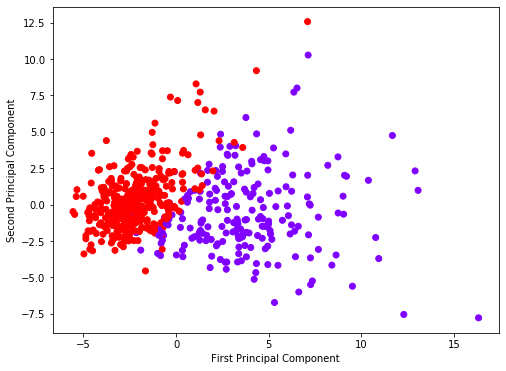

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

**Finding:** As we can see from the scatter plot, the PCA helps to distinguish malignant brest cancer from benign breast tumour.

**Step 5: Interprete the Components**

Its not easy to understand these component reduction.The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [29]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

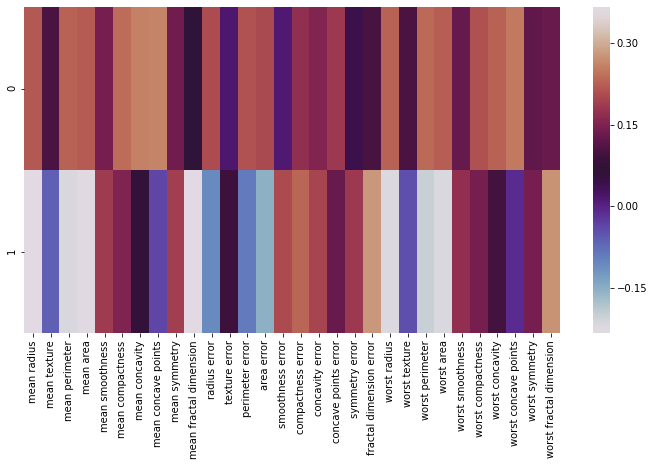

In [31]:
# We can visualize this using heatmap-

map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Example 2: Trade Sturcture##

In this case, I use PCA algorithm to analysis the data of export and import structure data of China and its 18 major trade partners.   
The data includes shares of different categories of merchandise exports in 2016, where the abbreviations stand for:  

MMTL: Ores and metals exports (% of merchandise exports)  
MANF: Manufactures edports (% of merchandise exports)  
INSF: Insurance and financial services (% of commercial service exports)  
ICTG: ICT goods exports (% total goods exports)  
FUEL: Fuel exports (% of merchandise exports)  
FOOD: Food exports (% of merchandise exports)  
AGRI: Agricultural raw materials exports (% of merchandise exports)  
  
Data comes from *World Bank WDI*. See https://data.worldbank.org/ for reference.

*Notice that the sum of export shares for each economy are usually above 100(%), because there are overlaps among categories.*

In [81]:
# Import data
datafile = "./data/Export Structure 2016.xlsx"
ex = pd.read_excel(datafile, index_col=0)
ex

,MMTL,MANF,INSF,ICTG,FUEL,FOOD,AGRI
AUS,31.718689,17.618145,5.568288,1.307327,27.653921,15.845985,2.940792
BRA,10.465105,39.862445,4.675611,0.389613,6.344692,37.290676,4.812005
CAN,7.112788,54.491779,11.683897,2.117709,18.284027,13.318946,4.929012
CNH,1.163359,93.754539,3.493364,26.497625,1.285976,3.154573,0.420347
DEU,2.326947,83.998874,12.432090,4.657138,1.729654,5.522656,0.715266
FRA,1.924184,79.833402,8.204326,3.981576,2.397809,12.439275,0.925561
GBR,3.573784,79.088193,32.852699,4.502104,6.523051,7.102898,0.605281
HKG,11.881454,62.984585,19.577304,49.992232,4.226232,17.305315,2.742667
IDN,5.724282,47.668319,1.838095,3.369205,19.303630,22.489825,4.766738
IND,3.069276,73.068260,4.471141,0.952560,10.771245,11.347099,1.379449


In [82]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ex)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
scaled_ex = scaler.transform(ex)

In [84]:
# Principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
pca.fit(scaled_ex)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
ex_pca = pca.transform(scaled_ex)

In [86]:
ex_pca.shape

(19, 2)

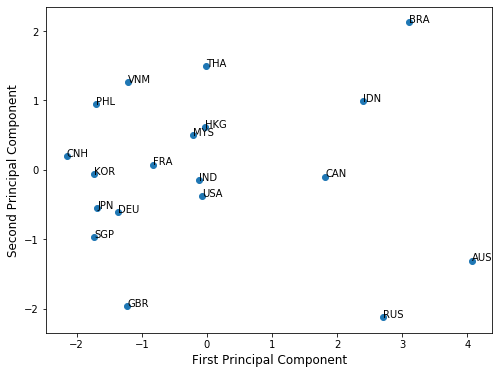

In [99]:
# Scatter plot
country = np.array(ex.index) 

fig = plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.scatter(ex_pca[:,0],ex_pca[:,1])
ax.set_xlabel('First Principal Component',fontsize=12) 
ax.set_ylabel('Second Principal Component',fontsize=12)

for i in range(19):
    ax.annotate(str(country[i]),(ex_pca[i,0],ex_pca[i,1]))

In [88]:
# Interpret the principal components
pca.components_

array([[ 0.39449455, -0.52159364, -0.10361528, -0.28333745,  0.38873288,
         0.36831204,  0.44105654],
       [-0.15612193,  0.1712046 , -0.46345706,  0.28993367, -0.4599319 ,
         0.54956004,  0.36593355]])

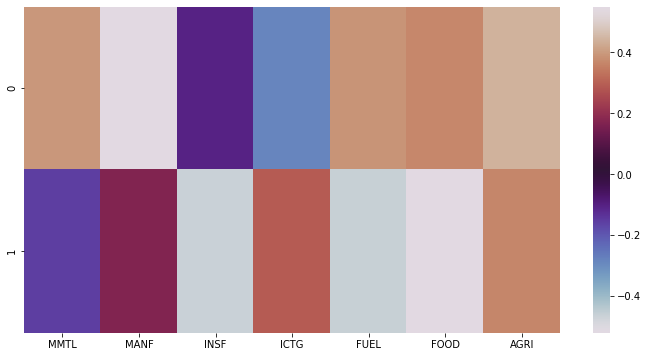

In [89]:
map= pd.DataFrame(pca.components_,columns=ex.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

Similarly, we can conduct PCA analysis on data of import structure.  
  
MMTL: Ores and metals imports (% of merchandise imports)  
MANF: Manufactures imports (% of merchandise imports)  
INSF: Insurance and financial services (% of commercial service imports)  
ICTG: ICT goods imports (% total goods imports)  
FUEL: Fuel imports (% of merchandise imports)  
FOOD: Food imports (% of merchandise imports)  
AGRI: Agricultural raw materials imports (% of merchandise imports)  
  
Data comes from World Bank WDI. See https://data.worldbank.org/ for reference.

In [90]:
# Import data
datafile = "./data/Import Structure 2016.xlsx"
im = pd.read_excel(datafile, index_col=0) 
im

,MMTL,MANF,INSF,ICTG,FUEL,FOOD,AGRI
AUS,1.650628,79.395895,3.823295,9.997245,9.593062,7.312321,0.710373
BRA,3.166539,77.084587,3.622204,8.437638,11.041102,7.400880,1.244480
CAN,2.612580,79.211049,11.895071,7.073490,6.478202,8.597119,0.906251
CNH,3.492405,68.187106,3.409531,23.755920,11.128807,6.533163,3.492405
DEU,3.742020,73.048475,6.172356,8.425617,7.154672,7.955714,1.329108
FRA,2.240980,78.284640,6.568859,6.666894,8.410143,9.811834,1.142235
GBR,2.758291,76.956365,6.974854,7.627615,6.931419,10.199291,1.276494
HKG,0.995456,91.572268,8.240444,50.307417,1.899918,5.257851,0.231365
IDN,3.184617,66.954967,5.450023,7.966882,14.328995,11.672274,3.093596
IND,5.534774,55.819472,6.638797,9.333341,26.787436,6.505293,2.166929


In [91]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(im)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
scaled_im = scaler.transform(im)

In [93]:
# Principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # We specify the number of components as 2
pca.fit(scaled_im)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
im_pca = pca.transform(scaled_im)

In [95]:
im_pca.shape

(19, 2)

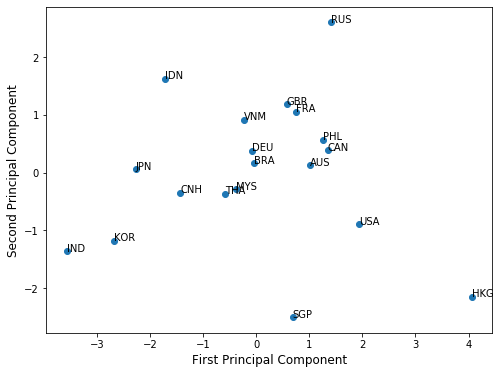

In [96]:
# Scatter plot
country = np.array(im.index) 

fig = plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.scatter(im_pca[:,0],im_pca[:,1])
ax.set_xlabel('First Principal Component',fontsize=12) 
ax.set_ylabel('Second Principal Component',fontsize=12)

for i in range(19):
    ax.annotate(str(country[i]),(im_pca[i,0],im_pca[i,1]))

In [97]:
# Interpret the principal components
pca.components_

array([[-0.49664031,  0.53684963,  0.24395094,  0.23308537, -0.45550593,
        -0.01923536, -0.37874051],
       [-0.09819596,  0.06891123, -0.18156309, -0.4875813 , -0.36560786,
         0.7323375 ,  0.21194526]])

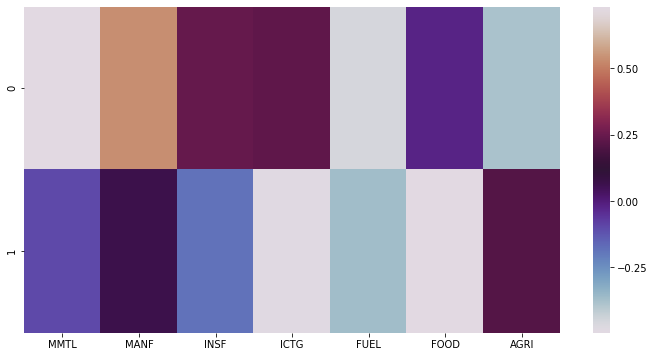

In [98]:
map= pd.DataFrame(pca.components_,columns=ex.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')